In [8]:
from triflow import Model, Simulation, display_fields
import scipy.signal as spsig
import numpy as np

import pylab as pl

import warnings
warnings.filterwarnings("ignore")

pl.style.use("publication")
%matplotlib inline

In [9]:
model = Model("-dxxzeta - dxxxxzeta + (dxzeta)**2", "zeta")

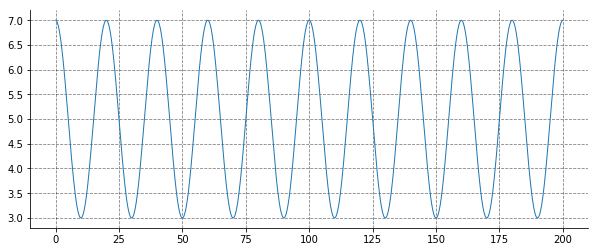

In [49]:
x = np.linspace(0, 200, 1010)
# zeta = np.random.randn(x.size) * 1E1 + 50
zeta = np.cos(x * 2 * np.pi / x.max() * 10) * 2 + 5

pl.figure(figsize=(10, 4))
pl.plot(x, zeta)
pl.show()

In [50]:
simul = Simulation(model,
                   fields=model.fields_template(x=x, zeta=zeta),
                   dt=1, tmax=200, tol=5E-0,
                   parameters=dict(periodic=True),
                   )
simul.attach_container()
display_fields(simul)

In [51]:
for i, (t, fields) in enumerate(simul):
    print(t, end='\r')

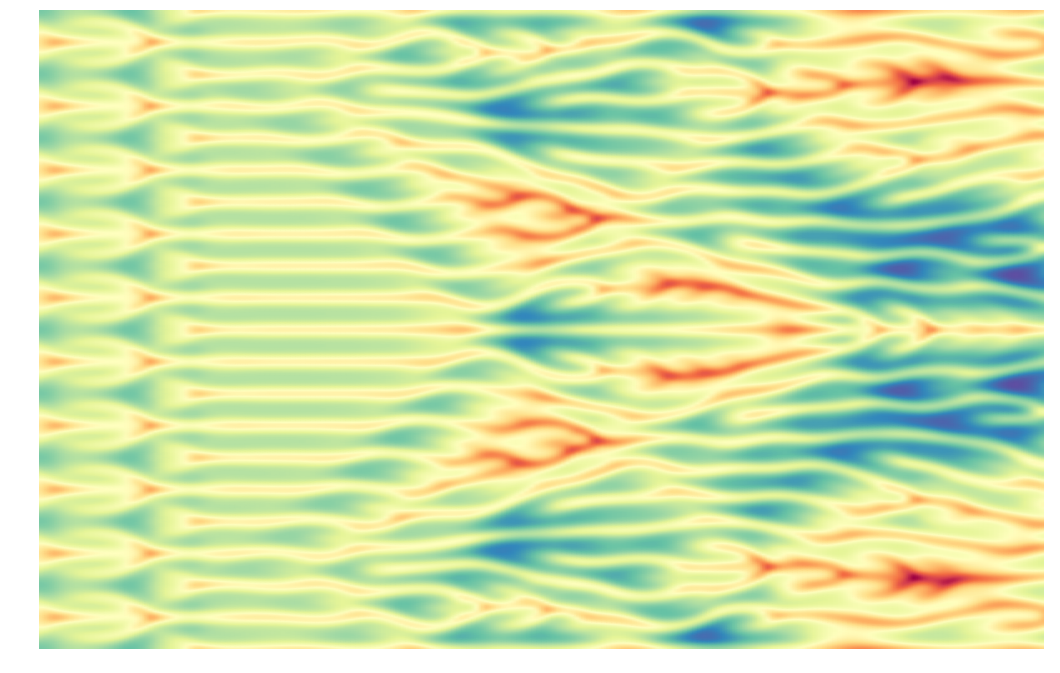

In [52]:
pl.figure(figsize=(18, 18 / (1568 / 1024)))
pl.pcolormesh((simul.container.data.zeta - simul.container.data.zeta.mean("x")).T,
              cmap="Spectral", shading="gouraud")
pl.grid(False)
pl.axis('off')
pl.savefig("../../docs/images/bg.png", bbox_inches='tight')

In [53]:
import pillow

ModuleNotFoundError: No module named 'pillow'